### EDA y GEDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv('/Volumes/MemoriaEle/HeavyData/incidentes-viales-c5.csv')

In [5]:
df.shape

(1383138, 18)

In [6]:
df.nunique()

folio                1383138
fecha_creacion          2637
hora_creacion         105887
dia_semana                 7
codigo_cierre              5
fecha_cierre            2621
año_cierre                 7
mes_cierre                12
hora_cierre           106827
delegacion_inicio         16
incidente_c4              26
latitud                82501
longitud               78984
clas_con_f_alarma          4
tipo_entrada               9
delegacion_cierre         16
geopoint              134288
mes                       12
dtype: int64

In [7]:
df.año_cierre.unique()

array([2016, 2017, 2018, 2019, 2015, 2014, 2020])

In [8]:
df.incidente_c4.unique()

array(['accidente-choque sin lesionados',
       'accidente-choque con lesionados',
       'lesionado-accidente automovilístico', 'accidente-volcadura',
       'lesionado-atropellado', 'accidente-otros',
       'accidente-persona atrapada / desbarrancada',
       'cadáver-accidente automovilístico', 'cadáver-atropellado',
       'accidente-motociclista', 'accidente-vehiculo desbarrancado',
       'accidente-choque con prensados', 'accidente-vehiculo atrapado',
       'accidente-ciclista', 'accidente-monopatín',
       'sismo-choque con lesionados',
       'accidente-vehículo atrapado-varado',
       'detención ciudadana-atropellado', 'accidente-ferroviario',
       'detención ciudadana-accidente automovilístico',
       'sismo-choque sin lesionados', 'sismo-persona atropellada',
       'Detención ciudadana-accidente automovilístico',
       'sismo-choque con prensados',
       'mi ciudad-calle-incidente de tránsito',
       'mi ciudad-taxi-incidente de tránsito'], dtype=object)

In [9]:
df.clas_con_f_alarma.unique()

array(['EMERGENCIA', 'URGENCIAS MEDICAS', 'FALSA ALARMA', 'DELITO'],
      dtype=object)

In [10]:
df.tipo_entrada.unique()

array(['BOTÓN DE AUXILIO', 'LLAMADA DEL 066', 'RADIO', 'CÁMARA', 'REDES',
       'LLAMADA DEL 911', 'LLAMADA APP911', 'ZELLO', 'APLICATIVOS'],
      dtype=object)

In [11]:
df.codigo_cierre.unique()

array(['(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada',
       '(N) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie solicitó el apoyo de la unidad',
       '(D) El incidente reportado se registró en dos o más ocasiones procediendo a mantener un único reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente',
       '(F) El operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que ésta es falsa. O al ser despachada una unidad de atención a emergencias en el lugar de los hechos se percatan que el incidente no corresponde al reportado inicialmente',
       '(I) El incidente reportado es afirmativo y se añade información adicional al evento'],
      dtype=object)

In [12]:
df = df.replace({'(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada':'A_afirmativo',
                          '(N) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie solicitó el apoyo de la unidad': 'N_negativo',
                          '(D) El incidente reportado se registró en dos o más ocasiones procediendo a mantener un único reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente':'D_diferido',
                         '(F) El operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que ésta es falsa. O al ser despachada una unidad de atención a emergencias en el lugar de los hechos se percatan que el incidente no corresponde al reportado inicialmente':'F_falsa',
                          '(I) El incidente reportado es afirmativo y se añade información adicional al evento': 'I_informativo'}) 

In [13]:
df.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
0,GA/160123/05714,23/01/2016,22:35:04,Sábado,A_afirmativo,24/01/2016,2016,Enero,00:21:08,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.422113,-99.084643,EMERGENCIA,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.422113,-99.084643",1
1,AO/160123/05826,23/01/2016,22:50:49,Sábado,A_afirmativo,24/01/2016,2016,Enero,04:40:37,CUAJIMALPA,accidente-choque con lesionados,19.358320,-99.297641,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAJIMALPA,"19.35832,-99.297641",1
2,C4/160124/02187,24/01/2016,09:40:11,Domingo,N_negativo,24/01/2016,2016,Enero,11:13:03,TLALPAN,accidente-choque sin lesionados,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1
3,C4/160124/05723,24/01/2016,22:40:57,Domingo,N_negativo,24/01/2016,2016,Enero,22:55:51,MAGDALENA CONTRERAS,accidente-choque sin lesionados,19.320580,-99.241010,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1
4,C4/160124/01334,24/01/2016,04:25:15,Domingo,A_afirmativo,24/01/2016,2016,Enero,05:03:59,MIGUEL HIDALGO,accidente-choque sin lesionados,19.452900,-99.215870,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.45289997,-99.21587004",1


In [14]:
df['latitud'].max()

195.303

In [15]:
df['latitud'].min()

19.09402002

In [16]:
df['longitud'].min()

-991.7639999999999

In [17]:
df['longitud'].max()

-98.94537

In [18]:
df['longitud'].quantile(.01)

-99.28618992

In [19]:
df.isnull().sum()

folio                  0
fecha_creacion         0
hora_creacion          0
dia_semana             0
codigo_cierre          0
fecha_cierre           0
año_cierre             0
mes_cierre             0
hora_cierre            0
delegacion_inicio    158
incidente_c4           0
latitud              443
longitud             435
clas_con_f_alarma      0
tipo_entrada           0
delegacion_cierre    140
geopoint             446
mes                    0
dtype: int64

In [20]:
df = df.dropna()

In [21]:
df.isna().sum()

folio                0
fecha_creacion       0
hora_creacion        0
dia_semana           0
codigo_cierre        0
fecha_cierre         0
año_cierre           0
mes_cierre           0
hora_cierre          0
delegacion_inicio    0
incidente_c4         0
latitud              0
longitud             0
clas_con_f_alarma    0
tipo_entrada         0
delegacion_cierre    0
geopoint             0
mes                  0
dtype: int64

In [22]:
df.shape

(1382534, 18)

In [23]:
df = df[df['longitud'] > -99.35]

In [24]:
df.shape

(1382502, 18)

In [25]:
df = df[df['latitud'] < 20]

In [26]:
df.shape

(1382502, 18)

In [27]:
df=df.sample(500000)

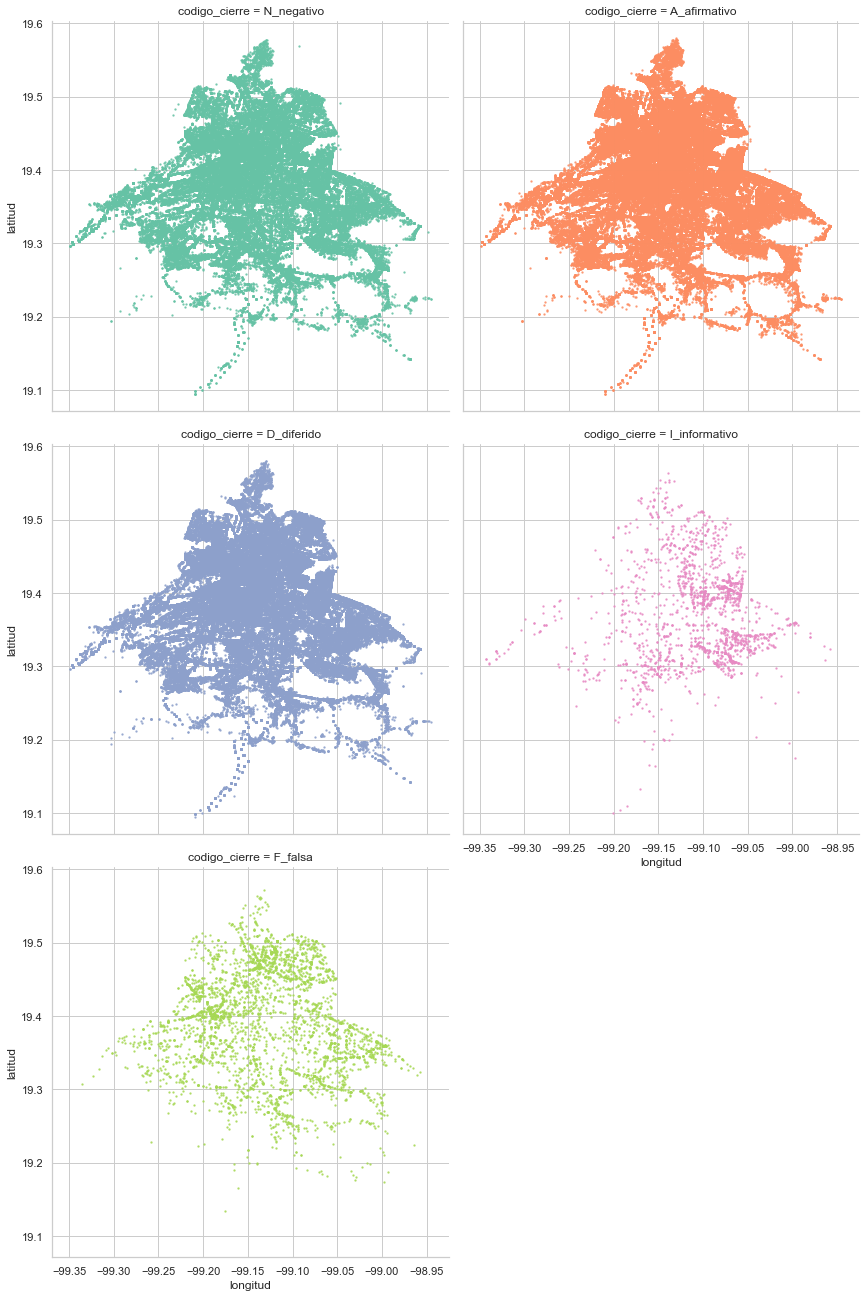

In [28]:
sns.set(style='whitegrid',rc={'figure.figsize':(3,3)},palette='Set2')
h=sns.lmplot(x='longitud',y='latitud',data=df,hue='codigo_cierre',fit_reg=False,
            col='codigo_cierre',col_wrap=2,height=6,scatter_kws={"s":2,"alpha":0.7})

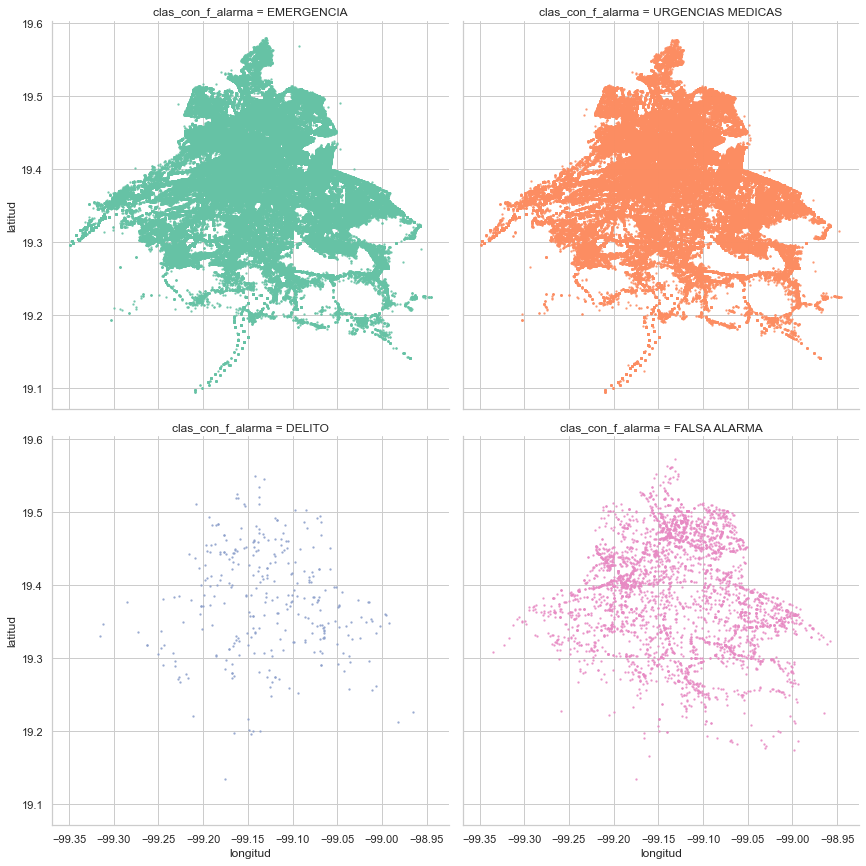

In [30]:
sns.set(style='whitegrid',rc={'figure.figsize':(3,3)},palette='Set2')
h=sns.lmplot(x='longitud',y='latitud',data=df,hue='clas_con_f_alarma',fit_reg=False,
            col='clas_con_f_alarma',col_wrap=2,height=6,scatter_kws={"s":2,"alpha":0.7})

In [31]:
#df.value_counts(['mes','año_cierre'])
df.groupby(["mes_cierre", "año_cierre"]).size().reset_index(name="counts")

,mes_cierre,año_cierre,counts
0,Abril,2014,4520
1,Abril,2015,5177
2,Abril,2016,4920
3,Abril,2017,5685
4,Abril,2018,7330
...,...,...,...
77,Septiembre,2016,6281
78,Septiembre,2017,6541
79,Septiembre,2018,7692
80,Septiembre,2019,7093


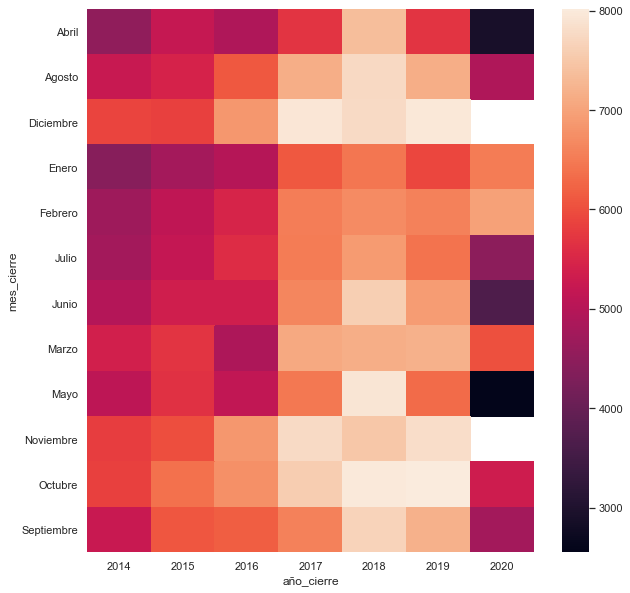

In [64]:
fig, ax = plt.subplots(figsize=(10,10))
flights = df.groupby(["mes_cierre", "año_cierre"]).size().reset_index(name="counts")
flights = flights.pivot("mes_cierre", "año_cierre", "counts")
ax = sns.heatmap(flights)

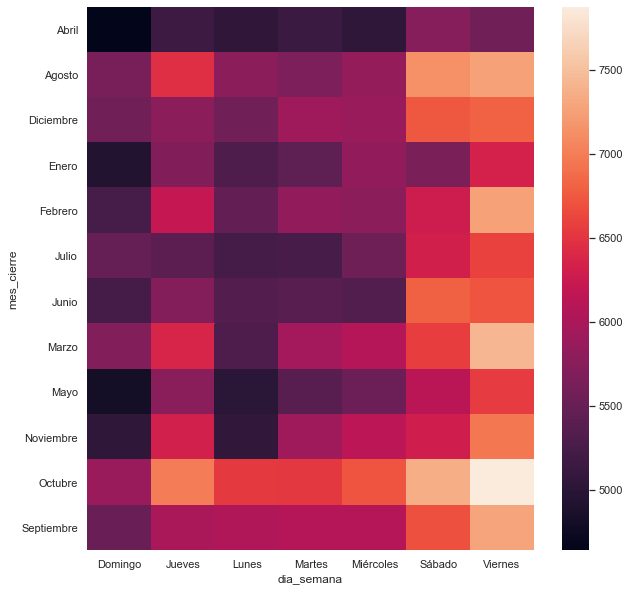

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
flights = df.groupby([ "mes_cierre","dia_semana",]).size().reset_index(name="counts")
flights = flights.pivot("mes_cierre", "dia_semana","counts")
ax = sns.heatmap(flights)

In [63]:
flights = df.groupby([ "año_cierre","mes_cierre","dia_semana",]).size().reset_index(name="counts")
flights

,año_cierre,mes_cierre,dia_semana,counts
0,2014,Abril,Domingo,491
1,2014,Abril,Jueves,621
2,2014,Abril,Lunes,527
3,2014,Abril,Martes,800
4,2014,Abril,Miércoles,736
...,...,...,...,...
569,2020,Septiembre,Lunes,578
570,2020,Septiembre,Martes,744
571,2020,Septiembre,Miércoles,702
572,2020,Septiembre,Sábado,767


In [13]:
flights = flights.pivot("mes_cierre", "dia_semana","counts")
ax = sns.heatmap(flights)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508
